# WORKING ON TITANIC DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#checking the columns
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#target variable is :survived
# rest of the variables will be used as independent variable
# the columns which will not be used for training data are 
# passengerId , name ,ticket
#so we will drop these


In [8]:
dataset.drop(columns=['PassengerId','Name','Ticket'],inplace =True)

In [9]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
#splitting the dependent and the independent variables

x_data = dataset[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked']]

y_data = dataset['Survived']

In [14]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
#let's check for the nullvalues in the data 
x_data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
y_data.isnull().sum()

0

In [19]:
#so in the x_data we have null values present in the Age column,cabin column and embarked

<AxesSubplot:title={'center':'Survived'}, xlabel='Age'>

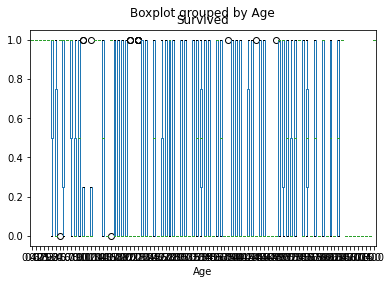

In [21]:
dataset.boxplot(by= 'Age',column = ['Survived'],grid = False)

<AxesSubplot:>

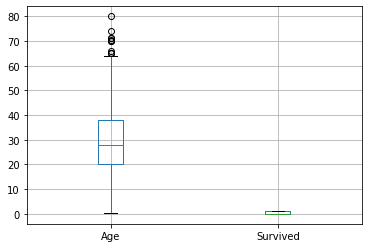

In [22]:
dataset.boxplot(column = ['Age','Survived'])

In [24]:
# we can fill the age column containing null values with the mean values 
x_data.fillna({'Age':x_data.Age.median()},inplace=True)

c:\users\91810\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [26]:
x_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
#dropping the null column

x_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
#resetting index values
x_data.reset_index(drop = True,inplace=True)

In [30]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [31]:
#Handling the categorical variable

In [32]:
sex = x_data['Sex']

In [33]:
sex = pd.get_dummies(sex,drop_first=True)

In [34]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [36]:
sibsp = x_data['SibSp']

In [37]:
sibsp = pd.get_dummies(sibsp,drop_first=True)

In [38]:
sibsp.head()

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0


In [39]:
x_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [40]:
embarked = x_data['Embarked']

In [41]:
embarked = pd.get_dummies(embarked,drop_first=True)

In [42]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
x_data['new_sex'] = sex

In [44]:
x_data = pd.concat([x_data,embarked],axis=1)


In [46]:
x_data = pd.concat([x_data,sibsp],axis=1)

In [47]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,new_sex,Q,S,1,2,3,4,5,8
0,3,male,22.0,1,0,7.2500,NaN,S,1,0,1,1,0,0,0,0,0
1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,1,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,NaN,S,0,0,1,0,0,0,0,0,0
3,1,female,35.0,1,0,53.1000,C123,S,0,0,1,1,0,0,0,0,0
4,3,male,35.0,0,0,8.0500,NaN,S,1,0,1,0,0,0,0,0,0


In [48]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,new_sex,Q,S,1,2,3,4,5,8
0,3,male,22.0,1,0,7.2500,NaN,S,1,0,1,1,0,0,0,0,0
1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,1,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,NaN,S,0,0,1,0,0,0,0,0,0
3,1,female,35.0,1,0,53.1000,C123,S,0,0,1,1,0,0,0,0,0
4,3,male,35.0,0,0,8.0500,NaN,S,1,0,1,0,0,0,0,0,0


In [49]:
x_data.columns

Index([  'Pclass',      'Sex',      'Age',    'SibSp',    'Parch',     'Fare',
          'Cabin', 'Embarked',  'new_sex',        'Q',        'S',          1,
                2,          3,          4,          5,          8],
      dtype='object')

In [50]:
x_data.drop(['Sex','Embarked'],inplace = True,axis=1)

In [51]:
x_data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,new_sex,Q,S,1,2,3,4,5,8
0,3,22.0,1,0,7.2500,NaN,1,0,1,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,C85,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,NaN,0,0,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,C123,0,0,1,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,NaN,1,0,1,0,0,0,0,0,0


In [57]:
#Now we need to scale the data in the same scale

In [53]:
from sklearn.preprocessing import StandardScaler

In [59]:
sd = StandardScaler()

In [60]:
scaled_x = sd.fit_transform(x_data)

ValueError: could not convert string to float: 'C85'